# Analyse data from vtu-files
*Date*: 2022-05-12,<br>
*Written by:* Johannes Borgqvist,<br>
Now we will try to load data from the FEM simulations of the RD model with FEniCS and see if we can analyse it. We will try to load the vtu-files into python, and then see if we can analyse the output data afterwards so to speak. 

### Import packages

In [72]:
import meshio # To extract the important parts of the mesh
import numpy as np # Import numpy as well
import Schnakenberg_properties # Home made
from matplotlib import pyplot as plt # Do the plotting using matplotlib

### Read the concentration profile from a vtu-file and plot it in Python
The aim of this section is to read the concentration profile from one of the vtu-files we have created through our simulations, and then plot it in Python. When we have read in the values into numpy-array, the goal is to be able to use k-means clustering to determine the number of poles we have in the concentration profile. 

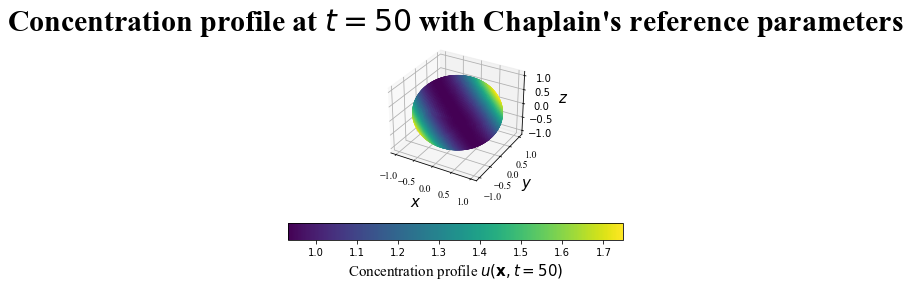

In [73]:
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# Define the parameter pairs
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# The parameters in the Schnakenberg model
a = 0.2
b = 1.0
# The wavenumber k^2
n = 2
k_squared = n*(n+1)
# Calculate the steady states and the critical parameters
u_0, v_0, d_c, gamma_c = Schnakenberg_properties.calculate_steady_states_and_critical_parameters_Schnakenberg(a,b,k_squared)
# Save the steady states in a list
steady_states = [u_0,v_0]
# Set the value of the relative diffusion
d = 18.0
# Set the value of the reaction strength to its critical value
gamma = gamma_c
# Define the number of holes
num_holes = 0
# Define the radius
radii_holes = []
# Define that we have the ICs around the steady states
ICs_around_steady_states = True
# Define the perturbation in the initial conditions
sigma = 1e-4
# Define the end time for the simulations
T = 50
# Let's start with the zeroth repitition
repitition_index = 0
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# DEFINE THE FOLDERS WE LOOK THROUGH
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
folder_str = "../Output/"
a_str = "a_" + str(round(a,3)).replace(".","p") + "_"
b_str = "b_" + str(round(b,3)).replace(".","p") + "_"
d_str = "d_" + str(round(d,3)).replace(".","p") + "_"
gamma_str = "gamma_" + str(round(gamma,3)).replace(".","p") + "_"
sigma_str = "sigma_" + str(round(sigma,3)).replace(".","p") + "_"
T_str = "T_" + str(round(T,3)).replace(".","p") + "_"
if ICs_around_steady_states:
    IC_str = "ICs_around_steady_states/"
else:
    IC_str = "ICs_at_zero/"
# Define the radius and the hole string
hole_str = "h_0_"
# Radius string
radius_str = ""
# Gather all these substrings into one giant string where we will save the output files
mesh_name = folder_str + hole_str + radius_str + a_str + b_str + d_str + gamma_str + sigma_str + T_str + IC_str + "iteration_" + str(repitition_index) + "/u000101"
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# Read the concentration profile and spatial coordinates
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# Read the msh file
conc_profile = meshio.read(mesh_name + ".vtu")
# Extract the concentration profile
u = np.asarray(list(conc_profile.point_data.values())[0])
# Extract the spatial coordinates
spatial_coordinates = conc_profile.points
# Save each of the coordinates as numpy arrays (i.e. we get three arrays named x, y and z)
x = np.asarray([spatial_coordinates[index][0] for index in range(len(spatial_coordinates))])
y = np.asarray([spatial_coordinates[index][1] for index in range(len(spatial_coordinates))])
z = np.asarray([spatial_coordinates[index][2] for index in range(len(spatial_coordinates))])
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
# Plot the concentration profile using matplotlib
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(x, y, z, c=u, cmap='viridis', alpha=1)
cb = plt.colorbar(img,label="Like/Dislike Ratio", orientation="horizontal")
cb.set_label(label='Concentration profile $u(\mathbf{x},t=50)$',fontname="Times New Roman", size=15)
# changing the fontsize of yticks
plt.xticks(fontname="Times New Roman", size=10)
plt.yticks(fontname="Times New Roman", size=10)
ax.set_xlabel('$x$',fontname="Times New Roman", size=15)
ax.set_ylabel('$y$',fontname="Times New Roman", size=15)
ax.set_zlabel('$z$',fontname="Times New Roman", size=15)
ax.set_title('Concentration profile at $t=50$ with Chaplain\'s reference parameters',fontname="Times New Roman", size=30,fontweight="bold")
plt.show()